# Network Science: Review

Consider product recommendation using a bipartite user-product graph. 


* $(X, y) = G_{up} = \{(u, v, w), \dots\} = \{(user, prod, rating), \dots\}$

* $y$ : Product
* $X$ : User 

## Simulating a Graph

In [6]:
Gup = {
    ("User1", "Product1", 4)
}

In [48]:
from random import randint, choice


users    = [ f"User{i}"    for i in range(20) ]
products = [ f"Product{i}" for i in range(20) ]

N_edges = 100

Gup = {
    (choice(users), choice(products), randint(6, 10)/2) 
    for _ in range(N_edges)
}


---

In [1]:
import networkx as nx

In [22]:
G = nx.from_edgelist(Gup, nx.MultiDiGraph)

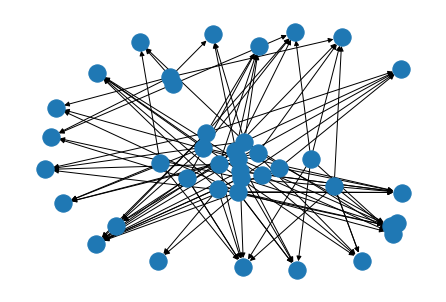

In [24]:
%matplotlib inline 
nx.draw(G)

---

### Step 0. A New Customer Arrives

$X^{new} = "Bob" \dots$, 

In [26]:
Gup.add( ("Bob", choice(products), 4) )

In [27]:
X_new = "Bob"

### 1. Find Similar Users

In [30]:
P = { v for (u, v, w) in Gup if u == X_new }
S = { u for (u, v, w) in Gup if (v in P) and u != X_new }

In [31]:
S

{'User0', 'User1', 'User16', 'User17', 'User2', 'User3', 'User9'}

### 2. Find their Products

In [33]:
R = { (v, w) for (u, v, w) in Gup if u in S }

### 3. Rank their Products

In [40]:
from statistics import mean

In [41]:
ranked = {}

for v, w in R:
    if v not in ranked:
        ranked[v] = []
        
    ranked[v].append(w)
    
for product in ranked:
    ranked[product] = mean(ranked[product])

### 4. Recommend top $k$ Products

In [46]:
recommendations = sorted([ 
    (rating, product) for product, rating in ranked.items() 
])[-3:]

In [47]:
recommendations

[(5.0, 'Product11'), (5.0, 'Product4'), (5.0, 'Product5')]

---